# Taking a Look at the Generated Chord-Trajectory Matrices

1. Move interpreter path up a directory (so we can import the other modules)

In [1]:
import os 
os.chdir('..')

2. load the dataset

In [2]:
from utils.load import load_dataset

In [3]:
ctjs, metadata = load_dataset() # NOTE: you should have to pass any arguments here

Loading matrices: 91it [00:00, 1166.53it/s]
2025-11-18 18:03:41.289 | SUCCESS  | utils.load:load_feature_matrices:45 - Loaded 91 matrices from data/ctms


3. Inspect

In [4]:
ctjs.head()

,id,matrix,path
id,,,
tt0026138,tt0026138,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/ctms/tt0026138_traj.npy
tt0029583,tt0029583,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/ctms/tt0029583_traj.npy
tt0032138,tt0032138,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/ctms/tt0032138_traj.npy
tt0040076,tt0040076,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/ctms/tt0040076_traj.npy
tt0045152,tt0045152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/ctms/tt0045152_traj.npy


In [5]:
metadata.head()

,title,released,director,imdbrating,ratings,genre
id,,,,,,
tt0026138,Bride of Frankenstein,06 May 1935,James Whale,7.8,"[{'Source': 'Internet Movie Database', 'Value'...","Drama, Horror, Sci-Fi"
tt0026174,Captain Blood,28 Dec 1935,Michael Curtiz,7.7,"[{'Source': 'Internet Movie Database', 'Value'...","Action, Adventure, History"
tt0029583,Snow White and the Seven Dwarfs,04 Feb 1938,"William Cottrell, David Hand, Wilfred Jackson",7.6,"[{'Source': 'Internet Movie Database', 'Value'...","Animation, Adventure, Family"
tt0029850,Alexander Nevsky,22 Mar 1939,"Sergei Eisenstein, Dmitriy Vasilev",7.5,"[{'Source': 'Internet Movie Database', 'Value'...","Action, Biography, Drama"
tt0032138,The Wizard of Oz,25 Aug 1939,"Victor Fleming, George Cukor, Norman Taurog",8.1,"[{'Source': 'Internet Movie Database', 'Value'...","Adventure, Family, Fantasy"


4. Plot some of them

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# merge metadata with ctjs
combined = ctjs.join(metadata)
combined.head()

,id,matrix,path,title,released,director,imdbrating,ratings,genre
id,,,,,,,,,
tt0026138,tt0026138,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/ctms/tt0026138_traj.npy,Bride of Frankenstein,06 May 1935,James Whale,7.8,"[{'Source': 'Internet Movie Database', 'Value'...","Drama, Horror, Sci-Fi"
tt0029583,tt0029583,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/ctms/tt0029583_traj.npy,Snow White and the Seven Dwarfs,04 Feb 1938,"William Cottrell, David Hand, Wilfred Jackson",7.6,"[{'Source': 'Internet Movie Database', 'Value'...","Animation, Adventure, Family"
tt0032138,tt0032138,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/ctms/tt0032138_traj.npy,The Wizard of Oz,25 Aug 1939,"Victor Fleming, George Cukor, Norman Taurog",8.1,"[{'Source': 'Internet Movie Database', 'Value'...","Adventure, Family, Fantasy"
tt0040076,tt0040076,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/ctms/tt0040076_traj.npy,Adventures of Don Juan,29 Jan 1949,Vincent Sherman,7.0,"[{'Source': 'Internet Movie Database', 'Value'...","Action, Adventure, Romance"
tt0045152,tt0045152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/ctms/tt0045152_traj.npy,Singin' in the Rain,10 Apr 1952,"Stanley Donen, Gene Kelly",8.3,"[{'Source': 'Internet Movie Database', 'Value'...","Comedy, Musical, Romance"


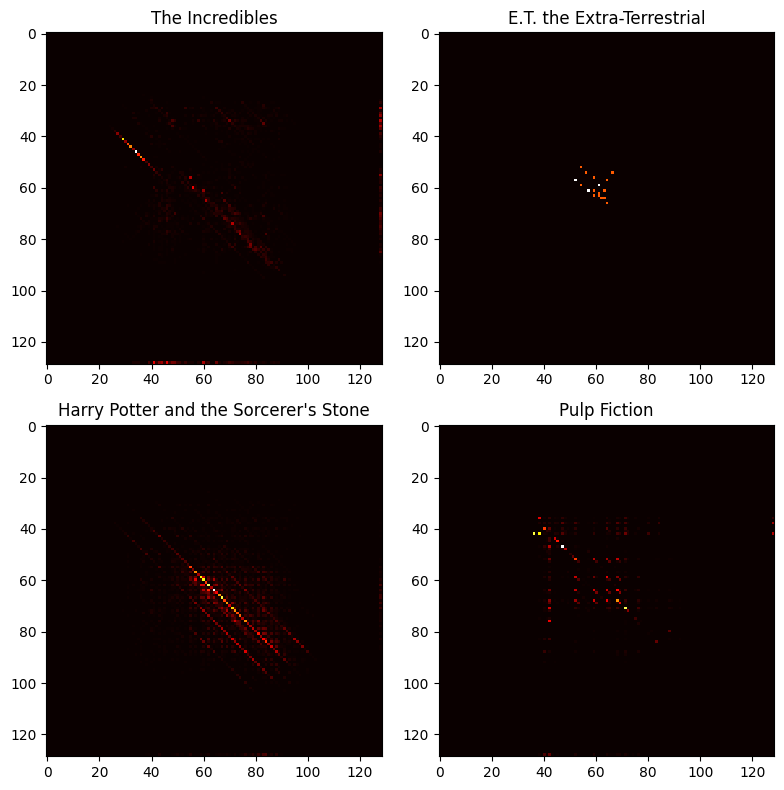

In [12]:
random_indices = np.random.choice(ctjs.shape[0], size=4, replace=False)
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for ax, idx in zip(axes.flatten(), random_indices):
    name = combined.iloc[idx]['title']
    matrix = combined.iloc[idx]['matrix']
    ax.imshow(matrix, cmap='hot', aspect='auto', interpolation='nearest')
    ax.set_title(name)
plt.tight_layout()
plt.show()